In [40]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_validate
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import joblib
from sklearn.model_selection import learning_curve
import sklearn

In [2]:
path =  'C://python//train//'
fallPath = path + 'fall_csv//'
normalPath = path + 'normal_csv//'

In [3]:
fallLabel = []
normalLabel = []

In [4]:
for file in os.listdir(fallPath):
    df = pd.read_csv(fallPath + file)
    for i in range(len(df)):
        fallLabel.append(1)

In [5]:
fallLabel, len(fallLabel)

([1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,


In [6]:
for file in os.listdir(normalPath):
    df = pd.read_csv(normalPath + file)
    for i in range(len(df)):
        normalLabel.append(-1)

In [7]:
normalLabel, len(normalLabel)

([-1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1

In [60]:
rawFallData = pd.concat([pd.read_csv(fallPath + file) for file in os.listdir(fallPath)])
rawNormalData = pd.concat([pd.read_csv(normalPath + file) for file in os.listdir(normalPath)]) 

In [61]:
data = np.concatenate((rawFallData, rawNormalData), axis=0)
label = np.concatenate((fallLabel, normalLabel), axis=0)

In [62]:
indices = np.arange(label.shape[0])

In [63]:
indices

array([    0,     1,     2, ..., 10517, 10518, 10519])

In [64]:
np.random.shuffle(indices)

In [65]:
data, label = data[indices], label[indices]

In [66]:
len(data), len(label)

(10520, 10520)

In [67]:
label

array([ 1, -1, -1, ..., -1,  1, -1])

In [68]:
x_train, x_test, y_train, y_test = train_test_split(data, label, test_size=0.2, random_state=0, shuffle=True)

In [69]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size= .25, shuffle=True)

In [70]:
x_train, len(x_train)

(array([[ 0.79864407,  0.40142134, -0.26079497, ...,  0.86724269,
          0.05415508,  0.50326771],
        [ 0.56734353,  0.57834065, -0.03679105, ...,  0.95641029,
          0.14992818,  0.4981575 ],
        [ 0.52478123,  0.44516656, -0.53049529, ...,  0.85891634,
         -0.04464824,  0.88822877],
        ...,
        [ 0.46271667,  0.45377705, -0.28437382, ...,  0.7633689 ,
         -0.2522774 ,  0.95273036],
        [ 0.30333215,  0.81121957, -0.08414619, ...,  1.03714204,
         -0.14611752,  0.88679063],
        [ 0.64898992,  0.49191397, -0.00968391, ...,  0.97991264,
         -0.06426285,  0.58810288]]),
 6312)

In [71]:
y_train, len(y_train)

(array([-1,  1,  1, ..., -1,  1,  1]), 6312)

In [72]:
x_val, len(x_val)

(array([[ 0.2234621 ,  0.80839318, -0.12688766, ...,  0.96460605,
          0.23221786,  0.32828182],
        [ 0.47290698,  0.6185798 , -0.25285345, ...,  0.84508955,
         -0.03883441,  0.82070506],
        [ 0.61005825,  0.25100943, -0.32321915, ...,  0.63076669,
          0.29862899,  0.69702023],
        ...,
        [ 0.32764941,  0.71181768,  0.05818062, ...,  0.12766267,
          0.03797675,  0.96377194],
        [ 0.48667088,  0.45195869, -0.15543187, ...,  1.01414704,
          0.15097708,  0.2065437 ],
        [ 0.60005343,  0.24524511, -0.22583589, ...,  0.78423989,
         -0.01071486,  0.89768744]]),
 2104)

In [73]:
param_grid = {'C': [0.1, 1, 10],
              'gamma': [1, 0.1, 0.01],
              'kernel': ['rbf', 'linear', 'poly', 'sigmoid']}
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
grid.fit(x_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.981 total time=   1.1s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.972 total time=   1.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.974 total time=   1.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.975 total time=   1.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.980 total time=   1.0s
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.846 total time=   0.5s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.840 total time=   0.5s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.843 total time=   0.5s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.849 total time=   0.5s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.853 total time=   0.5s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.998 total time=   0.4s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01],
                         'kernel': ['rbf', 'linear', 'poly', 'sigmoid']},
             verbose=3)

In [74]:
grid.best_params_

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}

In [75]:
grid_pred = grid.predict(x_test)
print(classification_report(y_test, grid_pred))

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00      1253
           1       1.00      1.00      1.00       851

    accuracy                           1.00      2104
   macro avg       1.00      1.00      1.00      2104
weighted avg       1.00      1.00      1.00      2104



In [76]:
cm = confusion_matrix(y_test, grid_pred)

In [77]:
cm

array([[1252,    1],
       [   0,  851]], dtype=int64)

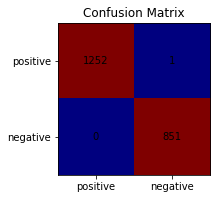

In [78]:
norm_conf = []
for i in cm:
    a = 0
    tmp_arr = []
    a = sum(i, 0)
    for j in i:
        tmp_arr.append(float(j)/float(a))
    norm_conf.append(tmp_arr)

fig = plt.figure()
plt.clf()
ax = fig.add_subplot(1,2,1)
ax.set_aspect(1)
res = ax.imshow(np.array(norm_conf), cmap=plt.cm.jet, 
                interpolation='nearest')

width, height = cm.shape

for x in range(width):
    for y in range(height):
        ax.annotate(str(cm[x][y]), xy=(y, x), 
                    horizontalalignment='center',
                    verticalalignment='center')

plt.title("Confusion Matrix")
plt.xticks(range(width), ['positive','negative'])
plt.yticks(range(height), ['positive','negative'])
plt.show()

In [79]:
model = SVC(kernel='rbf', C=10, gamma=1)
model.fit(x_train, y_train)

SVC(C=10, gamma=1)

In [80]:
scoring = ['accuracy','precision_macro', 'recall_macro', 'f1_macro']

In [81]:
for score in scoring:
    scores = cross_val_score(model, x_val, y_val, cv=10, scoring=score)
    print(score, scores.mean())

accuracy 0.9924035206499662
precision_macro 0.9920758032647182
recall_macro 0.9923346138258704
f1_macro 0.9921610109999459


In [82]:
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00      1253
           1       1.00      1.00      1.00       851

    accuracy                           1.00      2104
   macro avg       1.00      1.00      1.00      2104
weighted avg       1.00      1.00      1.00      2104



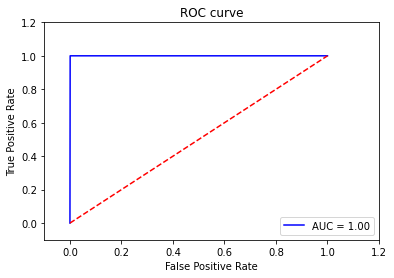

In [83]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.title('ROC curve')
plt.plot(false_positive_rate, true_positive_rate, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [27]:
joblib.dump(model, path + 'model//model_final3.sav')

['C://python//train//model//model_final3.sav']

In [116]:
train_sizes, train_scores, valid_scores = learning_curve(model, data, label, train_sizes=[6,50,100,200,400,500,1000,2000,3000,5000,7000,8000], cv=10, scoring='r2', n_jobs=-1)

In [41]:
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_we

In [117]:
train_scores = np.nan_to_num(train_scores)
valid_scores = np.nan_to_num(valid_scores)

In [118]:
train_mean = np.mean(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)

In [91]:
train_sizes

array([   6,   50,  100,  200,  400,  500, 1000, 2000, 3000, 5000, 7000,
       8000])

In [119]:
valid_scores

array([[ 0.        , -0.8662367 , -0.88205227, -0.92159118, -0.85832892,
        -0.86228281, -0.88747461, -0.90330249, -0.81229218, -0.92704431],
       [ 0.        , -0.38386196, -0.43526255, -0.40363142, -0.44317033,
        -0.42340087, -0.33349883, -0.39285338, -0.43638005, -0.44429399],
       [-0.47875535, -0.12290513, -0.14662848, -0.091274  , -0.16244405,
        -0.07941233, -0.01298428, -0.02881216, -0.11586549, -0.15147822],
       [ 0.28039178,  0.53739472,  0.51762526,  0.52157915,  0.50971748,
         0.57693363,  0.55286241,  0.57264726,  0.63200181,  0.48559392],
       [ 0.78648987,  0.818121  ,  0.83789046,  0.85765991,  0.80230543,
         0.83789046,  0.83380727,  0.8298503 ,  0.84963515,  0.82193636],
       [ 0.818121  ,  0.818121  ,  0.85370602,  0.84184435,  0.82602878,
         0.85370602,  0.84567818,  0.85359212,  0.84963515,  0.84567818],
       [ 0.8655677 ,  0.94069163,  0.9565072 ,  0.93673774,  0.94464552,
         0.93673774,  0.96438727,  0.95647333

In [120]:
valid_mean

array([-0.79206055, -0.36963534, -0.13905595,  0.51867474,  0.82755862,
        0.84061108,  0.9383039 ,  0.98378689,  0.99327777,  0.9956501 ,
        0.99881352,  0.99881352])

In [121]:
train_mean

array([0.9, 0.9, 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ])

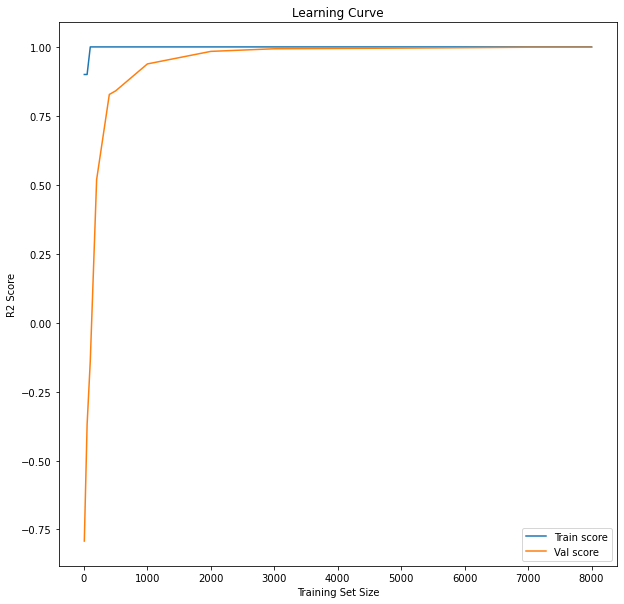

In [123]:
plt.subplots(1, figsize=(10,10))
plt.plot(train_sizes, train_mean, label="Train score")
plt.plot(train_sizes, valid_mean, label="Val score")
plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("R2 Score")
plt.legend(loc="best")

In [115]:
model.get_params

<bound method BaseEstimator.get_params of SVC(C=10, gamma=1)>